# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


**TEAM 14**

José María Blancas Ortiz             **A01363436**

Manuel Alejandro Cardona Esquivel    **A01795954**

David García Robles                  **A01152606**

Pablo de Jesús González Alvarado     **A01321850**

Yocoyani Ehecatzin Pérez Ayala       **A01796044**


In [ ]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
from sklearn.model_selection import train_test_split


%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
DATA_PATH = 'asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))


In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,12,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


### Import Images

In [ ]:
y_train = np.array(train_df['label'])
y_train = y_train.reshape(len(y_train), 1)
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_train = np.nan_to_num(x_train, nan=0)
x_val = valid_df.values.astype(np.float32)
x_val = np.nan_to_num(x_val, nan=0)

In [ ]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Create a function that will allow you to split the previously loaded validation set
    into valition and test.
    '''
    x_val, x_test, y_val, y_test = train_test_split(x,y, test_size=pct, random_state=7, shuffle=shuffle)
    x_val = x_val.reshape(len(x_val), -1).astype(float)
    x_test = x_test.reshape(len(x_test), -1).astype(float)
    y_val = y_val.reshape(len(y_val), 1)
    y_test = y_test.reshape(len(y_test), 1)
    return x_val, y_val, x_test, y_test

In [ ]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [ ]:
### The following

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise

In [ ]:
def normilise(x_mean, x_std, x_data):                                                   #Normalize the input using the formula selected  xmean: mean value of the data, x_std: standar deviation of the data, s_data: data to be normalized
  return (x_data - x_mean) / x_std

In [ ]:
x_mean, x_std = x_train.mean(), x_train.std()                                           #Compute the mean and standard deviation of the trainning data
x_std = np.where(x_std == 0, 1, x_std)                                                  #avoid division by zero by replacing standard deviation with 1
x_train_n = normilise(x_mean, x_std, x_train)                                           #Normalize the trainning data
x_val_n = normilise(x_mean, x_std, x_val)                                               #Normalize the validation data using the same mean and std as the trainning data
x_test_n = normilise(x_mean, x_std, x_test)                                             #Normalize the test data using the same mean and std dev.

### Plot samples

In [ ]:
def plot_number(image):                                                                 #Plot a single image in grayscale where input is a 2D array representing the image
    plt.figure(figsize=(5,5))                                                           #Create a new figure with a specific size
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))                              #Display the image in grayscale using the imshow function and where squeeze ensures the input is 2D by removing unnecessary dimensions
    plt.axis('off')
    plt.show()

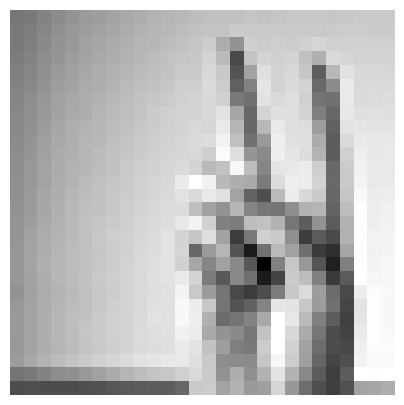

La imagen muestreada representa la letra: v


In [ ]:
idx = np.random.randint(len(y_test))                                                    #Select a random index from the test data
plained_image = x_test[idx].reshape(28,28)                                              #Reshape the selected test sample into a 28 by 28
plot_number(plained_image)                                                              #Display the reshaped image using the plot function
print(f'La imagen muestreada representa la letra: {alphabet[y_test[idx,0]]}')           #Print the corresponding letter from the alphabet testing

* Reshaping the test sample was crucial not only to be able to picture the image but also to undersatand the framing and functioning of all the model in this notebook. Altough it seemed like the easiest part, was one of the most important and challenging ones in order to run the model and execute the following steps.

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Additional functions

#### Mini batches

In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True):                                  #Creates minibatches from dataset x:Features matrix with shape y:Labels vector with shape, mb_size: Size of each batch, shuffle: Wheter to shuffle the data before creating minibatches
    '''
    x  #samples, 784
    y #samples, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error in the number of samples'                   #Mismatch in the number of samples
    total_data = x.shape[0]                                                             #Get total number of samples
    if shuffle:                                                                         #Create an array of indices for shuffling
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]                                                                      #Apply the shuffled indices to x and y
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))     #Iterate through the dataset in steps of mb_size and yield minibatches

## Our classes Linear, ReLU and Sequential

In [ ]:
class np_tensor(np.ndarray): pass                                                       #Custom subclass of Nympy arrar to add additional functionality or attributes.

In [ ]:
a = np.array([0, 0])                                                                    #Create a numpy array with two elements initialized to 0
b = a.view(np_tensor)                                                                   #Create a view of the array a with the type np_tensor

###  Linear Class

In [ ]:
class Linear():
    def __init__(self, input_size, output_size):                                                           #Initialize the parameter of the layer using Kaiming He
        '''
        Init parameters using Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)        #Initialize weights with random valus scaled by kaimng He method
        self.b = (np.zeros((output_size, 1))).view(np_tensor)                                              #Initialize biases to zero
    def __call__(self, X): # This is the foward of the Linear Class                                        #Performs the forward pass for the linear layer. X:Input matrix with shape, Output: Matriz with Z after applying the linear transformation
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):                                                                              #Performs the backward to pass to compute gradients for the layer. X:Input to the layer during the forward pass. Z: Output of the layer during the forward pass.
        X.grad = self.W.T @ Z.grad                                                                         #Compute the gradient of the input
        self.W.grad = Z.grad @ X.T                                                                         #Compute the gradient of the weights
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)                                              #Compute the gradient of the biases

### ReLU Class

In [ ]:
class ReLU():                                                                                              #Performs the forward pass for the ReLU activation Function. Z:Input matrix which is output of the previous layer. Returns: The ReLU Activation of Z
    def __call__(self, Z):                                                                                 #Applu ReLU
        return np.maximum(0, Z)
    def backward(self, Z, A):                                                                              #Performs the backward pass for the ReLU activation function.
        Z.grad = A.grad.copy()                                                                             #Copu the gradient from the next layer to avoid modifiyn the original
        Z.grad[Z <= 0] = 0                                                                                 #Set gradient to 0

### Sequential Class

In [ ]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - The list that contains Linear and ReLU objects
        '''
        self.layers = layers
        self.x = None                                                                                           # Each layer of the network receives the output of the previous layer and calculates its own output.
        self.outputs = {}                                                                                       # The output is stored in the "self.outputs" dictionary.
    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x                                                                                          # Final result of passing the input through all of the layers.
    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])                      # Backward propagation strats from the last layer and goes back all the way to the first.
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))

### Cost Function

In [ ]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)                                                                            # Calculation of softmax for x values
    probs = exp_scores / exp_scores.sum(axis = 0)                                                     # Exponential could make our numbers really big, that's why sometimes
    preds = probs.copy()                                                                              # substraction of the max value of x could be used in this part to
    # Cost                                                                                            # make our function numerically more stable (depends on results)
    y_hat = probs[y.squeeze(), np.arange(batch_size)]                                                 # The smaller the probability of the correct class, the larger the cost (or error). The cost is then averaged across all examples in the batch (batch_size).
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calculating gradients
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

### Loop de entrenamiento

In [ ]:
def train(model, epochs, x_train, y_train, x_val, y_val, mb_size=128, learning_rate = 1e-3):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):                    # Training in minibatches improves computational eficiency and model convergence
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            model.backward()                                                                          # It performs back propagation, that is, it calculates the gradients with respect to the model parameters
            model.update(learning_rate)                                                               # Optimization step, adjusting the parameters of the model (like gradient descent)
        print(f'cost: {cost}, accuracy: {accuracy(x_val, y_val, mb_size, model)}')

In [ ]:
def accuracy(x, y, mb_size, model):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

### Create your model and train it

In [ ]:
model = Sequential_layers([Linear(784, 600), ReLU(), Linear(600, 600), ReLU(), Linear(600, 600), ReLU(), Linear(600, 24)])
mb_size = 200
learning_rate = 5e-4                                                                                                         # e-4 gave us the opportunity to achieve the correct accuracy needed for this exercise
epochs = 25

In [ ]:
train(model, epochs, x_train_n, y_train, x_val_n, y_val, mb_size, learning_rate)

cost: 1.0931342581615573, accuracy: 0.5480880648899189
cost: 0.48723365770466365, accuracy: 0.6365392043259946
cost: 0.25330805699093834, accuracy: 0.7041328698339127
cost: 0.2496514445137618, accuracy: 0.7269215913480108
cost: 0.10416189750682397, accuracy: 0.7431440710699112
cost: 0.07159309705884268, accuracy: 0.746620316724604
cost: 0.056725995861878854, accuracy: 0.7585940517574353
cost: 0.0362625386148044, accuracy: 0.7636152954808807
cost: 0.030900594632603532, accuracy: 0.7643877945152568
cost: 0.03339049792792313, accuracy: 0.7697952877558903
cost: 0.02634923001557294, accuracy: 0.7713402858246428
cost: 0.022422936995738545, accuracy: 0.7655465430668211
cost: 0.0238501048743304, accuracy: 0.7694090382387022
cost: 0.017211416922369896, accuracy: 0.7709540363074546
cost: 0.00923961954468344, accuracy: 0.7682502896871379
cost: 0.016667643272081777, accuracy: 0.7690227887215141
cost: 0.011325934894672164, accuracy: 0.7690227887215141
cost: 0.010605782188042015, accuracy: 0.7701815

### Test your model on Random data from your test set

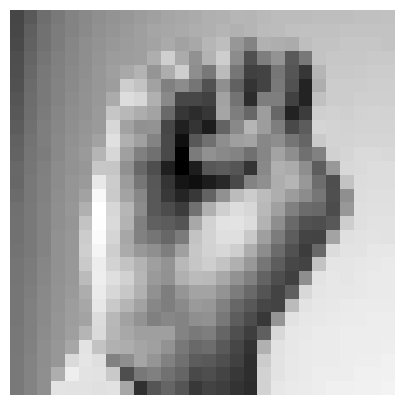

el valor predicho es: b el valor real es:e


In [ ]:
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred]} el valor real es:{alphabet[y_test[idx,0]]}')